<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 16th Feb, 2021
# Ref:
#   http://cs231n.github.io/neural-networks-2/
#	  https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
#
# Objective:
#   a) How Image augmentation is performed.
#   b) Image augmentation basics
#
#
# Data augmentation 4-steps:
#		  1. First create the ImageDataGenerator object with necessary properies
#	    2. If required, learn the 'train' data. Needed only for some types of
#        augmentation/processing such as zca_whitening. see Ref below:
#        Ref: https://stackoverflow.com/questions/46705600/keras-fit-image-augmentations-to-training-data-using-flow-from-directory
#	    3. Create the data-generator iterator using flow() method
#     4. Use the iterator in modeling in a for-loop
# Sample code:
# (https://keras.io/preprocessing/image/)
#
#		datagen = ImageDataGenerator( process_parameters)     # Create learner object
#		datagen.fit(X_train)                                  # Learn few statistical properties
#                                                         #   of train data
#		batch_gen_iterator = datagen.flow(X_train,            # Get iterator object
#                                     y_train,
#                                     batch_size=batch_size
#                                     )
#
#   for X_batch, y_batch in batch_gen_iterator:            # Use iterator--one way
#       model.fit(x_batch, y_batch)
#       batches += 1
#			  if batches >= 5:
#  	        break
#
#       model.fit_generator(batch_gen_iterator,             # Use iterator--another way
#                           steps_per_epoch=5,              # Call 5 batches from generator
#                           epochs=epochs
#                           )



In [1]:
#0.0 Display multiple command outputsfrom a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:

# 1. Call libraries
%reset -f

# 1.1
import numpy as np
import os
from matplotlib import pyplot as plt

# 1.2 Import tensorflow libraries
#     This will import mnist dataset
from tensorflow.keras.datasets import mnist

# 1.3 For generating images on the fly (no need to store)
#     from given images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1.4 Keras backend (functions) help in writing modules that work 
#     in all Keras backends, as: theano, cntk, tensorflow.
#     So use backend functions/methods for compatibility 
#     with all available backends.
#
#     Backend module, here, helps extract/set properties of keras-backend
#     By default the backend configuration file is at:
#     $HOME/.keras/keras.json or /home/ashok/.keras or
#     C:\Users\ashok\.keras\keras.json
#     Ref: https://keras.io/backend/

from tensorflow.keras import backend as K


# 1.5 Set image data format to be for tensorflow
#     Override, settings in the configuration file
#     That is set as channels_last, if not already so
K.set_image_data_format('channels_last') # Alternative 'channels_first' for theano


# 1.6 So what was the result of setting image data format above?
K.image_data_format()

'channels_last'

In [3]:
# 2. Use mnist module to fetch data from Internet & also load data
#    Dataset is cached locally at $HOME/.keras/datasets
#    or at C:\Users\ashok\.keras\datasets

In [4]:
# 2.1 Download mnist dataset.
#     Data download to C:\Users\ashok\.keras\datasets
#     mnist.npz. 'npz' is a file format where several
#     numpy arrays can be stored compressed or uncompressed
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
# 2.2 How many images and image dimensions?
#     Depth of image is important dimension.
#     It is missing here.

x_tr.shape                    # [60000,28,28]
x_te.shape                    # (10000,28,28)

(60000, 28, 28)

(10000, 28, 28)

In [6]:
# 2.3 Just look at first image and get its label
x_tr[0, :28, :28]
y_tr[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5

In [ ]:
# Create a grid of 3x3 images
# AA. Plot sample digit images

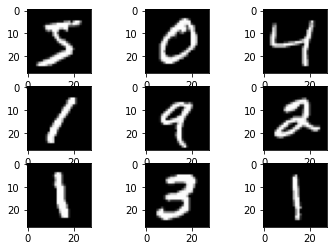

In [10]:
# 3. Plot nine images
for i in range(0, 9):        # range(0,9): Starting from 0, generate 9 numbers
                             # 0,1,..8 (9 is excluded)
	_=plt.subplot(3,3, i +1)  	 # Plot in a grid of 3 rows, 3 columns at position (i +1)
	                           # Try: help(plt.subplot)
	                           # For last image, i =8, 339 => 3 rows X 3 cols at index 9
	_=plt.imshow(x_tr[i],
  cmap=plt.get_cmap('gray')) # Map image color to gray palette
					                   # or colormap (try without cmap)


(9,)

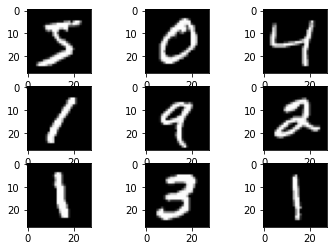

In [11]:
# 3.1 Another way to plot in a grid of 3 X 3
fig,ax = plt.subplots(3,3)
af = ax.flatten()
af.shape
for axx,j in zip(af,range(0, 9)):
	axx.imshow(x_tr[j],cmap= plt.cm.gray)
 
plt.show()

In [ ]:
######################## BB ##################################

In [ ]:
# 4.
## BB.Image generation and Feature Standardization
#     It is possible to standardize pixel values across the entire dataset.
#     One can perform feature standardization by setting the featurewise_center
#     and featurewise_std_normalization arguments on the ImageDataGenerator class.
#     These are in fact set to True by default and creating an instance of
#     ImageDataGenerator with no arguments will have the same effect.
# Standardize images across the dataset, mean=0, stdev=1


In [12]:
# 4.1 Add no_of_channels to shape (tensorflow format: WIDTH X HEIGHT X CHANNEL):
#     Reshape to be [NoOfSamples][width][height][channel]
x_tr[0,:28,:28].shape                           # It is a flat 2D image
# 4.1.1
X_train = x_tr.reshape(60000, 28, 28,1)         # Being gray coloured, no of channels is 1
X_test = x_te.reshape(10000,  28, 28,1)
# 4.1.2
X_train.shape


(28, 28)

(60000, 28, 28, 1)

In [13]:
# 4.2 Convert from int to float as required by Tensorflow
X_train.dtype                        # Unsigned integer

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train.dtype                         # 'float32'

dtype('uint8')

dtype('float32')

In [14]:
#4.2.1 For lack of memory, we will experiment 
#      on just 400 images
X_train = X_train[:400,...]
y_train = y_tr[:400,...]

In [ ]:
# 4.3 Define generated-data preparation parameters
#     & create the image generator object.
#     Generate images in batches on-the-fly from some given images

# 4.3.1
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
help(ImageDataGenerator)

In [ ]:
# 4.3.2
# See http://cs231n.github.io/neural-networks-2/
# featurewise_center
#     Mean subtraction is the most common form of preprocessing.
#     It involves subtracting the mean across every individual
#     feature in the data, and has the geometric interpretation
#     of centering the cloud of data around the origin along
#     every dimension. In numpy, this operation would be
#     implemented as: X -= np.mean(X, axis = 0).
#     With images specifically, for convenience it can be common
#     to subtract a single value from all pixels (e.g. X -= np.mean(X)),
#     or to do so separately across the three color channels.
# featurewise_std_normalization
#     Normalization refers to normalizing the data dimensions
#     so that they are of approximately the same scale. There
#     are two common ways of achieving this normalization.
#     One is to divide each dimension by its standard deviation,
#     once it has been zero-centered: (X /= np.std(X, axis = 0)).
#     Another form of this preprocessing normalizes each dimension
#     so that the min and max along the dimension is -1 and 1 respectively.
#     It only makes sense to apply this preprocessing if you have a reason
#     to believe that different input features have different scales
#     (or units), but they should be of approximately equal importance
#     to the learning algorithm. In case of images, the relative scales
#     of pixels are already approximately equal (and in range from 0 to 255),
#     so it is not strictly necessary to perform this additional preprocessing step.


In [15]:
# 4.3.3 Learner object
datagen = ImageDataGenerator(
                             zca_whitening=True,  # Ref: Kaggle: https://www.kaggle.com/nicw102168/exploring-zca-and-color-image-whitening
							                      # ZCA is a whitening transformation that decorrelates
							                      # (whiten) the data (image). De-correlation implies
												            # removing linear dependencies. In images lot of
												            # correlation exists between adjacent pixels.
												            # zca is a technique to remove this 'common information'
												            # between pixels. Consider this: We have a rectangle
												            # which is filled with white colour inside and outside
												            # colour is totally black. That is we have a black
												            # rectangle on which is superimposed white rectangle.
												            # If common information is removed, result will be
												            # just a 'white-boundary' of inner rectangle and
												            # both outside and inside of it completely black. We
												            # have, therefore, a sort of embossed picture.
												            # ==>  Transforms the image to a sort of embossed image <==
												            # That is effect of ZCA on 244,244,244,10,10,10,10 would be
												            #  approx: 0,0,244,0,0,0,0
												            # Less redundancy in the image is intended to better
												            #  highlight the structures and features in the image
												            #   to the learning algorithm. 
                             zca_epsilon=0.001,   # Sharpness of edges when data get decorrelated
							                      # See this link to check effect of zca_epsilon on image
							                      # https://stats.stackexchange.com/a/117459
                             featurewise_center=True,
                             featurewise_std_normalization=True
                            )


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [16]:

type(datagen)		 # ImageDataGenerator object
                 #  It is neither an iterable nor an interator object 



tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [17]:
# 4.4 Learn statistics of actual data, train
#     If you JUMP this step, you get a warning while plotting:
#     This ImageDataGenerator specifies `featurewise_center`, but it
#       hasn't been fit on any training data. Fit it
#        first by calling `.fit(numpy_data)`.

# 4.4.1 Learn data now
datagen.fit(X_train)

flow() method:<br>
Returns an Iterator yielding tuples of (x, y) where x is a numpy array of image data (in the case of a single image input) or a list of numpy arrays (in the case with additional inputs) and y is a numpy array of corresponding labels.

In [18]:
# 4.5 'datagen' itself is an iterator. One can Iterate
#     over it to get images. But this iterator needs
#     to be confiured using flow() method to decide
#     upon batch size to output at a time.
#     Create first the datagen.flow() iterator

# 4.4.2 Get iterator object. Iterator returns both
#       transformed data as also its label

batch_gen_iterator = datagen.flow(
                                   X_train,
                                   y_train,
                                   batch_size=9      # How many images to return at a time
                                  )

In [19]:
# 4.4.3 This is an iterator
type(batch_gen_iterator)		# Iterator object that retruns numpy arrays

tensorflow.python.keras.preprocessing.image.NumpyArrayIterator

In [20]:
# 4.5.1 Use (image) iterator, just to verify
# Get first batch of images and labels

img_batch = batch_gen_iterator
x,y = next(img_batch)
type(x)          # numpy.ndarray
type(y)			     # numpy.ndarray
x.shape          # Batch of 9 images of shape (28, 28, 1)
x[0].shape       # (28, 28, 1)

y.shape          # (9,) : One label for each image
y                # Get all nine labels

numpy.ndarray

numpy.ndarray

(9, 28, 28, 1)

(28, 28, 1)

(9,)

array([1, 4, 3, 6, 0, 9, 1, 9, 0], dtype=uint8)

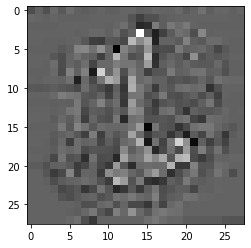

In [21]:
# 4.5.2 Reshape first image & plot
x = x[0].reshape(28,28)   # Get one image
plt.imshow(x,cmap=plt.cm.gray)

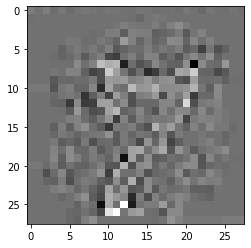

In [22]:
# 4.5.3 Same as above again
x,y = next(img_batch)
x = x[0].reshape(28,28)   # Get one image
plt.imshow(x, cmap=plt.get_cmap('gray'))

In [23]:
# 4.6 Configure batch size and retrieve one batch of images
def plot_images():
	for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
		# create a grid of 3x3 images
		for i in range(0, 9):
			plt.subplot(330 + 1 + i)
			img = X_batch[i].reshape(28, 28)
			plt.imshow(img, cmap=plt.cm.gray)
		# show the plot
		plt.show()
		break

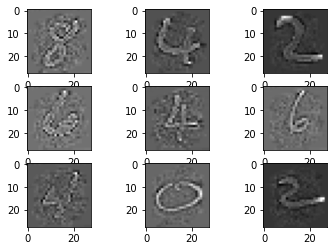

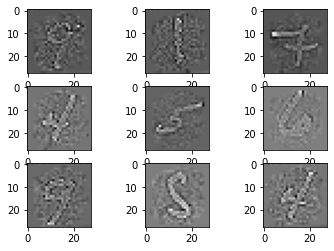

In [24]:
# 4.7 Iterate over data-generator to get images in batches
#     embossing is clearer in these images
#     'Emboss means image stands out in relief'
plot_images()       # Plot a batch of nine images
plot_images()       # Plot another batch of nine images



In [ ]:
# 4.8 Running above example one can see that the effect is different,
#     seemingly somewhat darkening and lightening different digits.

In [ ]:
######################## CC ##################################
#### Rotation of images

In [25]:
# 5.1 Let us retrieve again X_train, y_train
#     from original data
X_train = x_tr.reshape(60000, 28, 28,1)
X_test = x_te.reshape(10000,  28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train[:400,...]
y_train = y_tr[:400,...]

In [26]:
# 5.2 Reshaped to be [NoOfSamples][width][height][channel]
X_train.shape
X_test.shape

(400, 28, 28, 1)

(10000, 28, 28, 1)

In [27]:
# 6
## DD. Random Rotations
# Sometimes images in sample data may have varying and different rotations in the scene.
#  One can train one's model to better handle rotations of images by artificially and randomly
#   rotating images from dataset during training.

# 6.1 Define data preparation
datagen = ImageDataGenerator(
                            rotation_range=90
                            )

# 6.2 Fit parameters on our small data only (400 images)
datagen.fit(X_train)

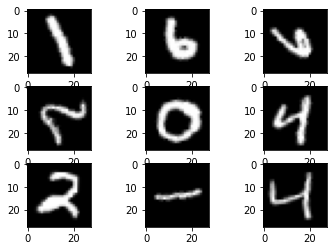

In [28]:
# 6.4
plot_images()

In [ ]:
# 7
## E. Random Shifts
#     Objects in images may not be centered in the frame. They may be off-center
#     in a variety of different ways. One can train deep learning network to expect
#     and currently handle off-center objects by artificially creating shifted versions
#     of training data. Keras supports separate horizontal and vertical random shifting
#     of training data by the width_shift_range and height_shift_range arguments.


In [29]:
# 7.1 Define shift values, horizontal and vertical
shift1 = 0.2
shift2 = 0.3
datagen = ImageDataGenerator(
                             width_shift_range=shift1,     # Horizontal shift
                             height_shift_range=shift2     # Vertical shift
                             )
# 7.2 Learn data
datagen.fit(X_train)

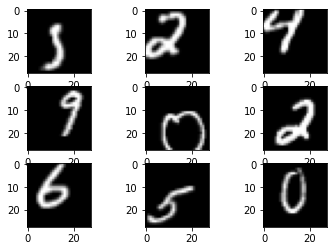

In [30]:
# 7.3 Configure batch size and retrieve one batch of images
plot_images()

In [ ]:
# 8
## F. Random Flips
#       Another augmentation to image data that can improve performance on
#       large and complex problems is to create random flips of images in
#       training data.  Keras supports random flipping along both the vertical
#       and horizontal axes using the vertical_flip and horizontal_flip arguments.

# 8.1 Define data preparation
datagen = ImageDataGenerator(
                             horizontal_flip=True,
                             vertical_flip=True,
                            )

# 8.2 Learn data
datagen.fit(X_train)

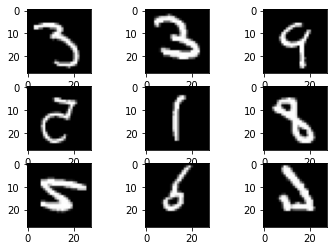

In [ ]:
# 8.3 Configure batch size and retrieve one batch of images
plot_images()

In [31]:
# 9
## G. Mixed. All in one.
#       Another augmentation to image data that can improve performance on
#       large and complex problems is to create random flips of images in
#       training data.  Keras supports random flipping along both the vertical
#       and horizontal axes using the vertical_flip and horizontal_flip arguments.

shift1 = 0.2
shift2 = 0.3
# 9.1 Define data preparation. All are applied in some measure
datagen = ImageDataGenerator(
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=shift1,     # Horizontal shift
                             height_shift_range=shift2,     # Vertical shift
                             rotation_range=90,
                             zoom_range = 2.0,
                             shear_range = 30             # Shear angle in counter-clockwise direction in degrees
                            )
# 9.2 Learn data
datagen.fit(X_train)

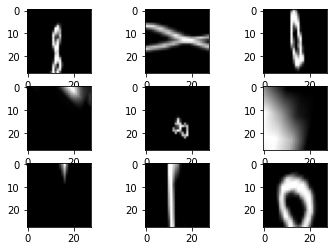

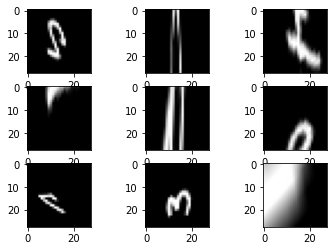

In [32]:
# 9.3 Configure batch size and retrieve one batch of images
plot_images()
plot_images()

In [ ]:
############ I am done

In [ ]:
###################### DD. #############################################

# 9
## F. Saving Augmented Images to File
#      The data preparation and augmentation is performed just in time by Keras.
#      This is efficient in terms of memory, but one may require the exact images
#      used during training. For example, perhaps one would like to use them with
#      a different software package later or only generate them once and use them
#      on multiple different deep learning models or configurations.
#      Keras allows you to save the images generated during training. The directory,
#      filename prefix and image file type can be specified to the flow() function
#      before training.

# 9.1 Define data preparation. All default parameter values
datagen = ImageDataGenerator()

# 9.2 Learn data statistics
datagen.fit(X_train)

# 9.3 Configure batch size and retrieve one batch of images
#dir = "/home/ashok/useless"
dir = "C:\\Users\\ashok\\useless"

# 9.4 Make directory
#os.system('rm -rf  /home/ashok/useless')
os.mkdir("C:\\Users\\ashok\\useless")


# 9.5 Generator iterator.
#     Generate images on-the-fy
data_iterator = datagen.flow(X_train,
                             y_train,
                             batch_size=9,
                             save_to_dir=dir,
                             save_prefix='aug',
                             save_format='png'
                             )

# 9.6 Generate and save
for X_batch, y_batch in data_iterator:
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
    break

########################


In [ ]:
# Supplementary Exercises:
# 1.
import numpy as np
x = np.linspace(-np.pi, +np.pi, 100)
for i in range(0,9):
	plt.subplot(520+i+1)
	plt.plot(x+i*10, np.sin(x+i*10))

plt.show()



# 2.0
x = np.random.randint(low = 0, high = 1000, size = (4,5))
x
x.shape
y = x.reshape((4,5,1))
y.shape
y
# 2.1
y.dtype
y = y.astype('float64')
y.shape


In [ ]:

######################## About ZCA whitening ###########################

##    ZCA Whitening ("Mahalanobis transformation")
#     What is whitening? See: 1. http://cs231n.github.io/neural-networks-2/
#                             2. https://en.wikipedia.org/wiki/Whitening_transformation
#     Whitening is something like PCA
#     A whitening transformation is a linear transformation (as PCA is) that transforms
#     a dataset with a known covariance matrix into a set of new variables whose
#     covariance is the identity matrix, meaning that they are uncorrelated and each
#     have variance 1.
#     The transformation is called "whitening" because it changes the input vector
#     into a white noise vector.
#     Less redundancy in the image is intended to better highlight the structures
#     and features in the image to the learning algorithm. See some images at this link:
#     https://stats.stackexchange.com/a/117459

## Impt Note: Before experimenting EXIT IPYTHON. Execute AA; Jump BB and then come to CC.
#########################################################################


In [ ]:

"""
Using ImageDataGenerator without fitting
========================================

Ref: https://stackoverflow.com/questions/46705600/keras-fit-image-augmentations-to-training-data-using-flow-from-directory
     https://github.com/keras-team/keras/issues/68

Just try to use the following object with zca_whitening:

train_datagen = ImageDataGenerator(
                                    rescale=1. / 255,    # Normalize colour intensities in 0-1 range
                                    shear_range=0.2,     # Shear varies from 0-0.2
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess,
                                    featurewise_center=True,
                                    zca_whitening=True
                                  )

When you do so set epochs to 1 in model.fit_generator.
The fitting process starts with a warning:

`zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)

As data is huge, fit can be called on a sample, as:
train_datagen .fit(X_sample)  # where X_sample is a small but random sample of your data

zca is a technique to remove 'common information'
between pixels. Consider this: We have a rectangle
which is filled with white colour inside and outside
colour is totally black. That is we have a black
rectangle on which is superimposed white rectangle.
If common information is removed, result will be
just a 'white-boundary' of inner rectangle and
both outside and inside of it completely black. We
have, therefore, a sort of embossed picture.

"""

In [ ]:
## My rough work

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape  # (60000, 28, 28)
x_test.shape

(60000, 28, 28)

(10000, 28, 28)

(28, 28)

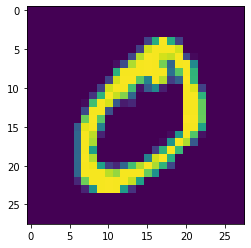

In [ ]:
fig = plt.figure()
plt.imshow(x_train[1])
x_train[1].shape

In [ ]:
shift1 = 0.2
shift2 = 0.3
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=shift1,     # Horizontal shift
                             height_shift_range=shift2,     # Vertical shift
                             rotation_range=90,
                             zoom_range = 2.0,
                             shear_range = 30   )

In [ ]:
x_train = x_train.reshape(-1, 28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
dx = datagen.fit(x_train)

In [ ]:
type(dx)

NoneType

In [ ]:
abc = datagen.flow(x_train,y_train, batch_size = 32)

In [ ]:
batch = next(abc)

In [ ]:
len(batch)   # 2

2

In [ ]:
batch[0].shape

(32, 28, 28, 1)

In [ ]:
for X_batch, y_batch in abc:
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


In [ ]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     